# Advanced ANOVA Techniques in Python
**Author:** Your Name  
**Description:** This notebook demonstrates one-way, two-way, and repeated measures ANOVA along with post-hoc analysis and assumptions checking.

In [1]:
# 1. Imports and Setup

# Install pingouin (only needs to be run once)
%pip install pingouin --quiet

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
import pingouin as pg

# Set seaborn style
sns.set(style="whitegrid")

Note: you may need to restart the kernel to use updated packages.


## 2. One-way ANOVA

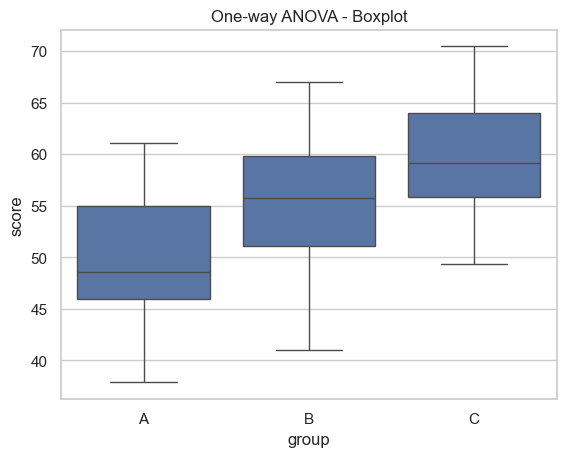

One-way ANOVA Results:
                sum_sq    df          F        PR(>F)
group     1332.966476   2.0  19.710498  8.708672e-08
Residual  2941.784706  87.0        NaN           NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B   5.4839 0.0013 1.9038  9.0639   True
     A      C   9.3822    0.0 5.8022 12.9623   True
     B      C   3.8984 0.0295 0.3183  7.4785   True
---------------------------------------------------


In [2]:
# Simulated dataset
np.random.seed(123)
group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(55, 5, 30)
group3 = np.random.normal(60, 5, 30)

df_oneway = pd.DataFrame({
    'score': np.concatenate([group1, group2, group3]),
    'group': ['A']*30 + ['B']*30 + ['C']*30
})

# Boxplot
sns.boxplot(x='group', y='score', data=df_oneway)
plt.title("One-way ANOVA - Boxplot")
plt.show()

# ANOVA
model = ols('score ~ group', data=df_oneway).fit()
anova_results = sm.stats.anova_lm(model, typ=2)
print("One-way ANOVA Results:\n", anova_results)

# Post-hoc
tukey = pairwise_tukeyhsd(df_oneway['score'], df_oneway['group'])
print("\nTukey HSD Results:\n", tukey)

## 3. Two-way ANOVA with Interaction


Two-way ANOVA with Interaction:
                              sum_sq    df          F    PR(>F)
C(Treatment)             451.090213   1.0  11.928923  0.001060
C(Gender)                107.711437   1.0   2.848391  0.097028
C(Treatment):C(Gender)     4.266317   1.0   0.112821  0.738210
Residual                2117.630587  56.0        NaN       NaN


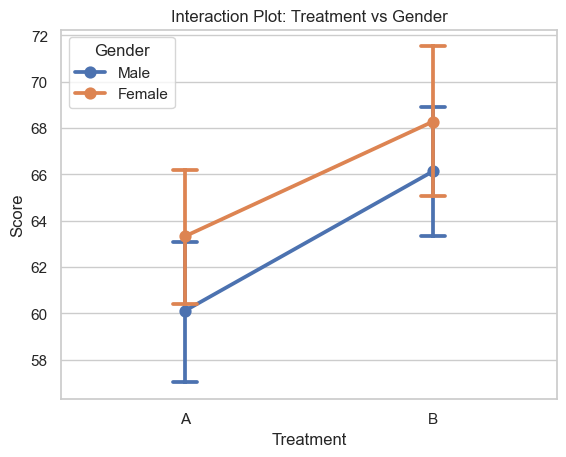

In [3]:
# Simulate data
np.random.seed(123)
df_tw = pd.DataFrame({
    'Treatment': np.repeat(['A', 'B'], 30),
    'Gender': np.tile(['Male', 'Female'], 30),
    'Score': np.random.normal(60, 5, 60)
})
df_tw['Score'] += (df_tw['Treatment'] == 'B') * 5
df_tw['Score'] += (df_tw['Gender'] == 'Female') * 3

# Two-way ANOVA with interaction
model2 = ols('Score ~ C(Treatment) * C(Gender)', data=df_tw).fit()
anova_table = sm.stats.anova_lm(model2, typ=2)
print("\nTwo-way ANOVA with Interaction:\n", anova_table)

# Interaction plot
sns.pointplot(x='Treatment', y='Score', hue='Gender', data=df_tw, capsize=.1)
plt.title("Interaction Plot: Treatment vs Gender")
plt.show()

## 4. Repeated Measures ANOVA

In [4]:
# Simulate within-subject data
subjects = np.repeat(np.arange(1, 16), 3)
conditions = np.tile(['Pre', 'Mid', 'Post'], 15)
scores = np.random.normal(50, 5, 45)
scores += (conditions == 'Mid') * 5
scores += (conditions == 'Post') * 10

df_rm = pd.DataFrame({
    'Subject': subjects,
    'Condition': conditions,
    'Score': scores
})

# Repeated Measures ANOVA with Pingouin
rm_anova = pg.rm_anova(dv='Score', within='Condition', subject='Subject', data=df_rm, detailed=True)
print("\nRepeated Measures ANOVA:\n", rm_anova)


Repeated Measures ANOVA:
       Source          SS  DF          MS          F     p-unc       ng2  \
0  Condition  720.241129   2  360.120565  10.180603  0.000476  0.353737   
1      Error  990.449792  28   35.373207        NaN       NaN       NaN   

        eps  
0  0.966544  
1       NaN  


## 5. Assumption Checks

In [5]:
# Normality - Shapiro-Wilk
for group in df_oneway['group'].unique():
    stat, p = stats.shapiro(df_oneway[df_oneway['group'] == group]['score'])
    print(f"Shapiro-Wilk test for {group}: W={stat:.3f}, p={p:.3f}")

# Homogeneity - Levene’s Test
stat, p = stats.levene(group1, group2, group3)
print(f"\nLevene's Test for Equal Variances: W={stat:.3f}, p={p:.3f}")

Shapiro-Wilk test for A: W=0.962, p=0.351
Shapiro-Wilk test for B: W=0.987, p=0.972
Shapiro-Wilk test for C: W=0.978, p=0.757

Levene's Test for Equal Variances: W=0.231, p=0.794
